### Introduction
In this notebook, I use python programming language for prepping and visualization the data.

Thank to python community for making open source.

And also, thank to data provider EDGAR(Emissions Database for Global Atmospheric Research). You can download the file from the link [EDGAR](https://edgar.jrc.ec.europa.eu/booklet2018/EDGARv5.0_FT2017_fossil_CO2_booklet2018.xls).

### Importing library

In [1]:
%store -r __importing_Lib

In [2]:
__importing_Lib

matplotlib inline backend and ggplot style are used.
Mplotlib version : 3.0.2
Numpy version	 : 1.15.4
Pandas version	 : 0.24.1
Seaborn version	 : 0.9.0
Wordcloud version: 1.5.0
Other imported is: datetime      
		 : base64      
		 : Json


### Data importing and cleaning

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
pd.set_option('display.max_columns', 50)

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ebd903fa1f234f68a46ff7178f8c1e7e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zWjcEiJpNhRuIpcTP98_6ePohks2ZmiQpTM5VXqaq6fF',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ebd903fa1f234f68a46ff7178f8c1e7e.get_object(Bucket='mkzproject-donotdelete-pr-piwghsabuxrpkz',Key='EDGARv5.0_FT2017_fossil_CO2_booklet2018.xls')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

carbon_df = pd.read_excel(body,
                          sheet_name='fossil_CO2_totals_by_country',
                          skipfooter=3,
                          index_col=0)
carbon_df.columns = list(map(str, range(1970, 2018)))
carbon_df.index.name = None
carbon_df['total'] = carbon_df[list(map(str, range(1970, 2018)))].sum(axis=1)
carbon_df.sort_values('total', ascending=False, inplace=True)
carbon_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total
United States,4700.442593,4559.409065,4807.030516,4994.593521,4827.419794,4612.546517,4907.271052,5071.365396,5066.244895,5105.068531,4877.371739,4807.962003,4562.166138,4541.549825,4751.807135,4777.184401,4736.598507,4894.815355,5118.583071,5175.797099,5085.896784,5046.534890,5128.145232,5249.209892,5326.854476,5379.707757,5528.165152,5702.979288,5717.638921,5738.467798,5942.427756,5882.474238,5803.653423,5878.563276,5964.465752,5971.571218,5867.364040,5946.141058,5754.288794,5339.094743,5580.707796,5451.511124,5273.584600,5341.065980,5413.771542,5247.226361,5146.300675,5107.393212,251710.432935
China,905.702330,909.490327,970.480168,1010.964814,1029.079341,1179.440223,1226.795283,1379.166366,1555.391439,1593.197822,1559.202220,1545.757609,1616.232974,1701.425517,1855.510863,1870.860230,1976.837700,2115.387714,2275.880128,2354.908651,2397.048052,2532.281676,2664.818900,2889.903130,3070.949644,3382.894171,3366.804617,3426.096234,3504.428799,3435.887590,3671.621881,3845.342160,4147.307156,4813.481884,5556.218548,6263.064351,6963.173928,7639.403674,7807.050481,8365.838944,9124.808251,10024.344052,10256.379348,10717.512969,10805.765645,10808.380415,10777.367716,10877.217944,203767.103881
Russia,1314.168399,1315.623348,1379.089137,1457.188344,1529.017538,1635.475682,1690.020968,1727.377806,1833.384824,1855.228102,1907.136680,1902.319514,1936.975034,1958.102714,1977.151504,2003.871739,2061.403009,2110.351880,2158.361879,2163.772925,2378.920942,2340.541169,2151.792063,1956.917737,1789.132758,1746.157161,1702.533258,1589.117292,1591.590435,1638.225007,1675.397319,1682.594323,1671.120528,1735.972585,1734.065716,1733.949894,1770.334352,1771.873830,1757.251010,1654.271844,1731.455606,1817.878850,1799.085425,1743.390650,1724.704543,1730.126181,1745.536658,1764.865676,86044.823839
Japan,857.790736,855.638368,901.449068,1015.383241,1013.875765,958.145061,988.541784,1013.468177,1013.478803,1039.189588,1013.129639,990.721228,948.047675,950.001277,1017.960421,991.567524,987.976743,994.331913,1066.556331,1096.635901,1149.399800,1153.385894,1161.200560,1150.128416,1206.425658,1221.107399,1233.407686,1226.565786,1187.836907,1227.724815,1241.516860,1229.089793,1268.365289,1271.971202,1270.203668,1276.862861,1259.770815,1300.173417,1213.596864,1146.257127,1197.379496,1249.883838,1289.286259,1313.474058,1393.625967,1336.499699,1319.801846,1320.776125,54529.607352
Germany,1082.023653,1076.490600,1103.013119,1152.534454,1122.346500,1062.396363,1122.836852,1103.091070,1141.039931,1190.997031,1137.986738,1102.427695,1055.920028,1071.523522,1087.534492,1090.120084,1083.531123,1074.581491,1068.229912,1054.328045,1018.097096,996.322783,943.137760,934.821138,923.859142,918.735705,945.842306,913.677381,906.532132,873.420986,871.124850,887.090249,871.428318,873.595628,857.737109,837.283835,853.974012,822.473278,829.357321,768.827127,815.945348,790.985538,803.978517,821.623582,784.831077,789.892519,798.582119,796.528910,46232.658466


### Data visualization

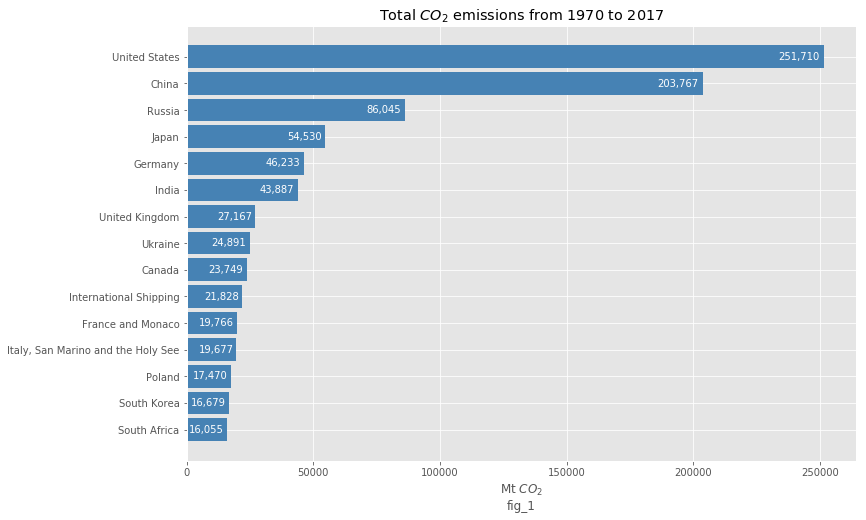

In [4]:
plt.figure(figsize=(12, 8))
top_15 = carbon_df.head(15)['total'].sort_values()
plt.barh(top_15.index,top_15, color='steelblue', height=0.85)
for i,v in enumerate(top_15):
    y = v-18000 if v>200000 else v-15000
    plt.text(y, i-0.1, f'{v:,.0f}', color='white')
plt.title('Total $CO_2$ emissions from 1970 to 2017')
plt.xlabel('Mt $CO_2$\nfig_1');

In [5]:
co2_total = carbon_df.total.sum()
print(co2_total)
percentage = carbon_df.total/co2_total*100
percentage.head(15)

1197816.6630157505


United States                         21.014103
China                                 17.011544
Russia                                 7.183472
Japan                                  4.552417
Germany                                3.859744
India                                  3.663933
United Kingdom                         2.268061
Ukraine                                2.077998
Canada                                 1.982657
International Shipping                 1.822300
France and Monaco                      1.650189
Italy, San Marino and the Holy See     1.642776
Poland                                 1.458499
South Korea                            1.392411
South Africa                           1.340347
Name: total, dtype: float64

### Commenting on bar chart

Based on the total $CO_2$ emissions amount **(1,197,817 metric tons)** from **1970 to 2017**, we can see that the **United States and China** are the biggest contributors to climate meltdown **(fig_1)**. **72.9%** of total $CO_2$ are produced by the top fourteen countries and international activity

In [6]:
top_6 = carbon_df.head(6).sort_values('total').iloc[:, : -1].T
top_6.describe()

,India,Germany,Japan,Russia,China,United States
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,914.316727,963.180385,1136.033486,1792.600497,4245.147998,5243.967353
std,660.479440,128.461104,142.405095,228.666370,3357.450591,433.294225
min,233.717573,768.827127,855.638368,1314.168399,905.702330,4541.549825
25%,349.051277,849.801468,1013.383543,1680.795072,1610.474186,4890.454451
50%,716.587547,938.979449,1157.293227,1745.846909,2980.426387,5161.048887
75%,1230.501621,1082.400520,1252.355582,1914.596268,6438.091745,5611.275669
max,2454.773797,1190.997031,1393.625967,2378.920942,10877.217944,5971.571218


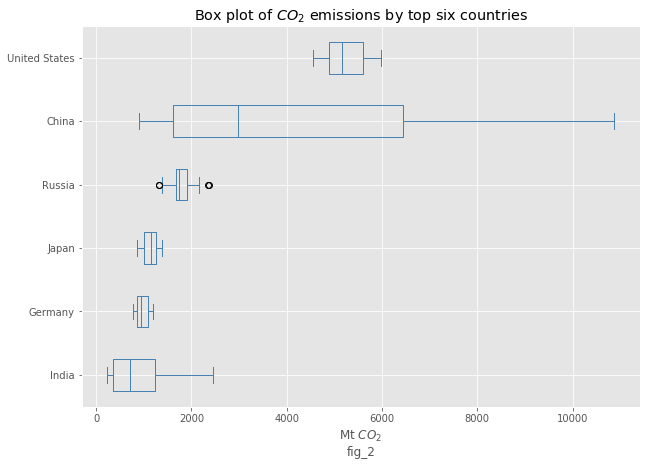

In [7]:
top_6.plot.box(vert=False, color='steelblue', figsize=(10,7))
plt.title('Box plot of $CO_2$ emissions by top six countries')
plt.xlabel('Mt $CO_2$\nfig_2');

### Commenting on box plot

When we look at the box plot **(fig_2)**, **China** has the widest range of $CO_2$ emissions from about **1,000(Mt) to 11,000(Mt)**. But on the other, **Germany** has the narrowest range from about **800(Mt) to 1200(Mt)**. The **countries** from the graph keep their $CO_2$ emissions at some amount except **China and India**.

In [8]:
def fifth_grouping(x):
    if x<'1976':
        return '[1970, 1975]'
    if x<'1981':
        return '[1976, 1980]'
    if x<'1986':
        return '[1981, 1985]'
    if x<'1991':
        return '[1986, 1990]'
    if x<'1996':
        return '[1991, 1995]'
    if x<'2001':
        return '[1996, 2000]'
    if x<'2006':
        return '[2001, 2005]'
    if x<'2011':
        return '[2006, 2010]'
    if x<'2016':
        return '[2011, 2015]'
    if x<'2021':
        return '[2016, 2017]'

fifth_df = carbon_df.groupby(fifth_grouping, axis=1, sort=False).apply(np.mean, axis=1)
fifth_df.sort_values('[2016, 2017]', inplace=True, ascending=False)
fifth_df['different'] = fifth_df['[2016, 2017]'] - fifth_df['[1970, 1975]']
fifth_df.head(6)

,"[1970, 1975]","[1976, 1980]","[1981, 1985]","[1986, 1990]","[1991, 1995]","[1996, 2000]","[2001, 2005]","[2006, 2010]","[2011, 2015]","[2016, 2017]",different
China,1000.859534,1462.750626,1717.957439,2224.012449,2908.169504,3480.967824,4925.082820,7980.055056,10522.476486,10827.292830,9826.433296
United States,4750.240335,5005.464323,4688.133900,5002.338163,5226.090449,5725.935783,5900.145581,5697.519286,5345.431922,5126.846944,376.606609
India,248.864786,291.944998,382.205877,537.894589,708.104511,904.049520,1095.972603,1518.659105,2074.808920,2412.906791,2164.042005
Russia,1438.427075,1802.629676,1955.684101,2174.562127,1996.908178,1639.372662,1711.540609,1737.037328,1763.037130,1755.201167,316.774092
Japan,933.713707,1013.561598,979.659625,1058.980138,1178.449585,1223.410411,1263.298563,1223.435544,1316.553964,1320.288986,386.575279
Germany,1099.800781,1139.190324,1081.505164,1059.753533,943.375306,902.119531,865.427028,818.115417,798.262246,797.555514,-302.245267


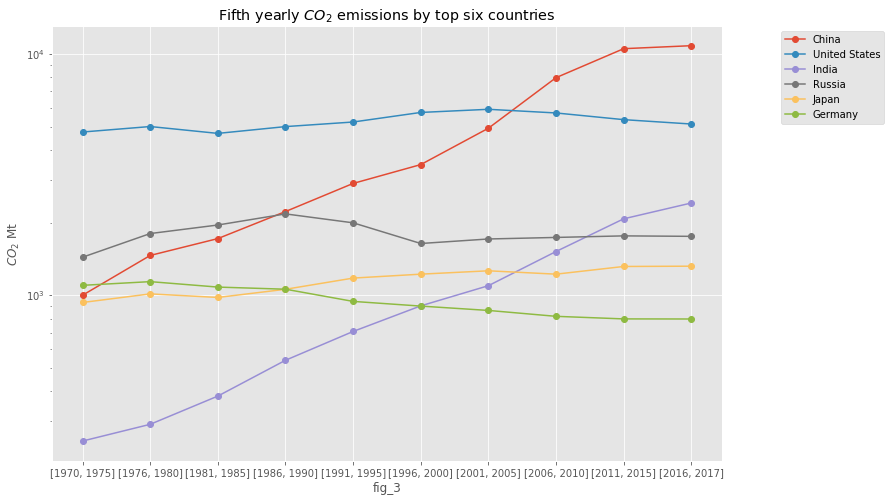

In [9]:
plt.figure(figsize=(12,8))
temp1_df = fifth_df.iloc[:15, :-1][:6].T
plt.semilogy(temp1_df, 'o-')
plt.legend(temp1_df.columns,framealpha=1, loc=1, bbox_to_anchor=(1.25,1))
plt.title('Fifth yearly $CO_2$ emissions by top six countries')
plt.ylabel('$CO_2$ Mt')
plt.xlabel('fig_3');

### Commenting on line plot

In the plot **(fig_3)**, I used the log scale values for the y-axis for the aesthetic of the chart as **China** $CO_2$ emissions reached to about $11,000$ that made most of the data points are clustered at the bottom of the graph. The **United States and Russia** kept their $CO_2$ emissions at about their average amount **5243.97(Mt) and 1792.60(Mt)** respectively. We can see that **China and India** try to put $CO_2$ into the environment. As y-values are the log scale, the trend lines of **China and India** look similar. The slopes of **China and India** are **1091.83(Mt) and 240.45(Mt)** respectively. Interestingly, **Germany** is the only country that has downward trending. In 2017, **Germany** reduced **170(Mt)** from its average $CO_2$ emission amount(**963Mt**).

In [10]:
mm_df = carbon_df.loc['Myanmar'][:-1]
mm_df.describe()

count    48.000000
mean      8.616745
std       5.793665
min       4.185103
25%       5.086381
50%       6.436120
75%       9.353426
max      28.461878
Name: Myanmar, dtype: float64

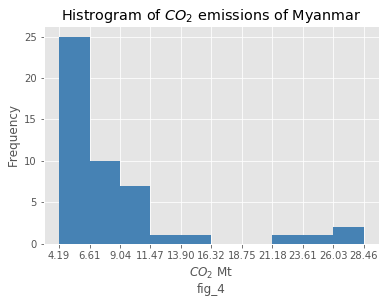

In [11]:
count, bin_edges = np.histogram(mm_df)
tb = np.linspace(mm_df.min(), mm_df.max(), 11)
mm_df.plot.hist(xticks=tb, color='steelblue').set(xlabel='$CO_2$ Mt\nfig_4', 
                                                  title='Histrogram of $CO_2$ emissions of Myanmar');

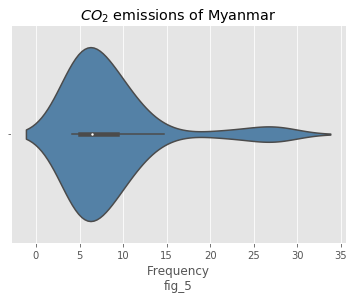

In [12]:
sns.violinplot(mm_df, color='steelblue').set(title='$CO_2$ emissions of Myanmar',
                                                      xlabel='Frequency\nfig_5');

In [13]:
mm = carbon_df.loc['Myanmar', '2017']
cc= carbon_df.loc['China', '2017']
usa = carbon_df.loc['United States', 'total']
mm, cc*0.002617, usa*0.001643

(28.4618779110754, 28.465679358853677, 413.5602413120399)

### Conclusion

The total amount of $CO_2$ emissions of Our country **(Myanmar)** from **1970 to 2017** is **413.6(Mt)**. It is an infinitesimal amount compare to developed countries like the **United States**. **0.1643%** of total CO_2 emissions amount of **United States** is the same as our country's. In **2017**, **0.2617%** of the $CO_2$ emissions amount of **China** is the same as the amount of our country. 
**My conclusion is that if we reduce 100% of our CO_2 emissions amount, it doesn't impact on the climate.**



**Thanks for spending time on this notebook. I hope I'll give some sense to you.**